## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
import numpy as np
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from matplotlib import pyplot as plt
import seaborn as sns
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import pandas as pd
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import adam

Using TensorFlow backend.


In [2]:
#Connect Google drive to colab
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/AIML_Project/Dog_breed/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [4]:
!unzip -q '/gdrive/My Drive/DogBreed_Classification/train.zip'

replace train/000bec180eb18c7604dcecc8fe0dba07.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train/001513dfcb2ffafc82cccf4d8bbaba97.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Repeat the same step for test.zip

In [5]:
!unzip -q '/gdrive/My Drive/DogBreed_Classification/test.zip'

replace test/000621fb3cbb32d8935728e48679680e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace test/000621fb3cbb32d8935728e48679680e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace test/000621fb3cbb32d8935728e48679680e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace test/000621fb3cbb32d8935728e48679680e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace test/000621fb3cbb32d8935728e48679680e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace test/000621fb3cbb32d8935728e48679680e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace test/000621fb3cbb32d8935728e48679680e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace test/000621fb3cbb32d8935728e48679680e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]


Repeat the same step for sample_submission.csv.zip

In [6]:
!unzip -q '/gdrive/My Drive/DogBreed_Classification/sample_submission.csv.zip'

replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Repeat the same step for labels.csv.zip

In [7]:
!unzip -q '/gdrive/My Drive/DogBreed_Classification/labels.csv.zip'

replace labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
labels = pd.read_csv("labels.csv",header=0, sep=',', quotechar='"')

### Print the count of each category of Dogs given in the dataset



In [9]:
print(labels.groupby(by='breed').count())

                                 id
breed                              
affenpinscher                    80
afghan_hound                    116
african_hunting_dog              86
airedale                        107
american_staffordshire_terrier   74
...                             ...
welsh_springer_spaniel           79
west_highland_white_terrier      81
whippet                          95
wire-haired_fox_terrier          82
yorkshire_terrier                82

[120 rows x 1 columns]


### Get one-hot encodings of labels

In [0]:
labels_en_df = pd.get_dummies(labels.breed)


In [11]:
labels_en_df.head(10)


,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows = 128
img_cols = 128

In [0]:
x_train = []
y_train = []

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [14]:

for f, img in tqdm(labels.values):
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img,(img_rows,img_cols))
  x_train.append(train_img_resize)
  y_train.append(img)

100%|██████████| 10222/10222 [00:29<00:00, 342.26it/s]


In [0]:
x_train = np.array(x_train).astype("float32") / 255

Text(0.5, 1.0, 'Distribution of the Dog Breeds')

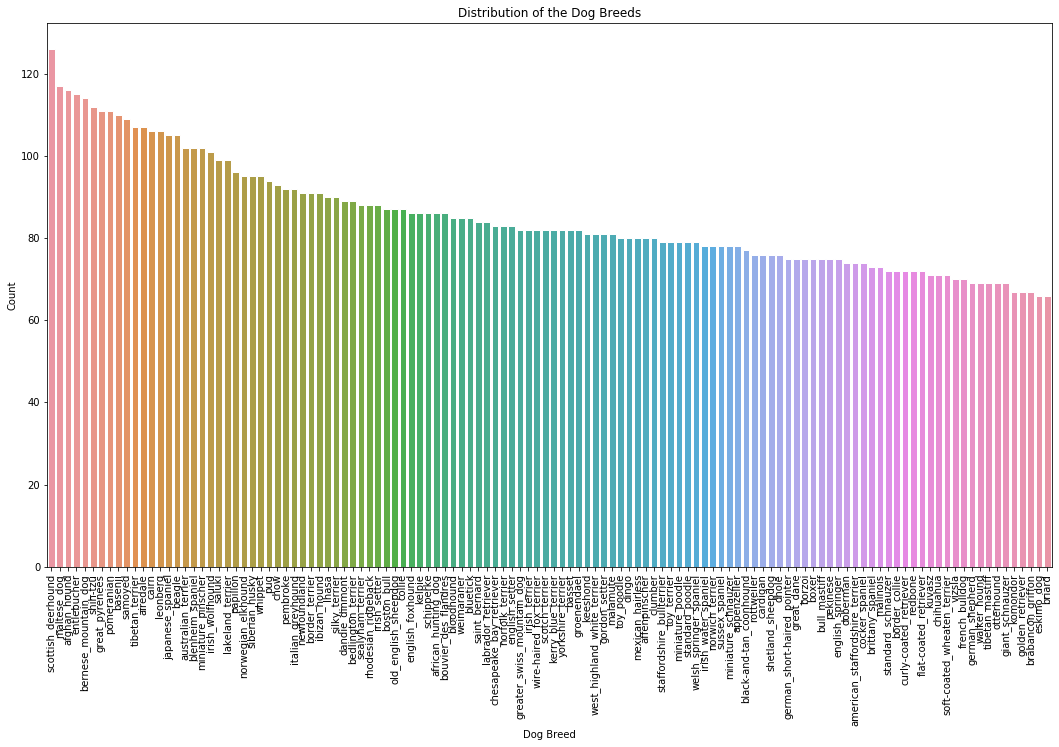

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(18,10)
sns.set_style("whitegrid")

ax = sns.barplot(x = pd.value_counts(labels['breed']).index, y = pd.value_counts(labels['breed']), data = labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 10)
ax.set(xlabel='Dog Breed', ylabel='Count')
ax.set_title('Distribution of the Dog Breeds')

In [0]:
y_train_class = pd.get_dummies(y_train)


In [18]:
y_train_class.shape


(10222, 120)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
### Split the Dataset
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train_class, test_size=0.3, random_state=123)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img_df = pd.read_csv('sample_submission.csv',usecols=[0])


In [21]:
test_img_df.head()


,id
0,000621fb3cbb32d8935728e48679680e
1,00102ee9d8eb90812350685311fe5890
2,0012a730dfa437f5f3613fb75efcd4ce
3,001510bc8570bbeee98c8d80c8a95ec1
4,001a5f3114548acdefa3d4da05474c2e


Run the below code to load the test image files in x_test_feature

In [22]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img_df.id): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:14<00:00, 727.51it/s]


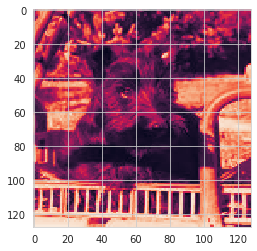

In [23]:
lum_img = x_test_feature[20]
plt.imshow(lum_img)
plt.show()

Normalize the test data and convert it into 4 dimensions

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [24]:
from keras.callbacks import ModelCheckpoint
# Initialize and Build the Model
BATCH_SIZE = 128
EPOCHS = 10

# Define the Type of Model
model1 = Sequential()
# 1st Conv Layer
model1.add(BatchNormalization(input_shape = (128,128,3)))
model1.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (128, 128, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(3, 3)))

# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(3, 3)))

# Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(256))
model1.add(Activation('relu'))

# Dense Layer
model1.add(Dense(120))
model1.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  from ipykernel import kernelapp as app


In [25]:

# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#checkpoint = ModelCheckpoint("DogBreed_Classification.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='min')
#callbacks_list = [checkpoint]


In [26]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 40, 40, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)       

### Use batch_size = 128 and epochs = 10 and execute the model

In [27]:
%%time
#checkpoint = ModelCheckpoint("DogBreed_Classification.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]
# Train the model
model1.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, 
              validation_data=(X_val, y_val))
              #callbacks = callbacks_list, verbose=0)
    

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 5s 649us/step - loss: 4.8092 - acc: 0.0089 - val_loss: 4.7873 - val_acc: 0.0140
Epoch 2/10
7155/7155 [==============================] - 3s 363us/step - loss: 4.7772 - acc: 0.0102 - val_loss: 4.7812 - val_acc: 0.0183
Epoch 3/10
7155/7155 [==============================] - 3s 363us/step - loss: 4.7631 - acc: 0.0155 - val_loss: 4.7752 - val_acc: 0.0192
Epoch 4/10
7155/7155 [==============================] - 3s 366us/step - loss: 4.7494 - acc: 0.0184 - val_loss: 4.7693 - val_acc: 0.0189
Epoch 5/10
7155/7155 [==============================] - 3s 362us/step - loss: 4.7340 - acc: 0.0245 - val_loss: 4.7609 - val_acc: 0.0209
Epoch 6/10
7155/7155 [==============================] - 3s 361us/step - loss: 4.7131 - acc: 0.0277 - val_loss: 4.7524 - val_acc: 0.0241
Epoch 7/10
7155/7155 [==================

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [0]:

data = ImageDataGenerator(validation_split=0.2, 
                          rescale=1/255,
                          samplewise_center=True, # set input mean to 0 over the sample
                          samplewise_std_normalization=True,  # divide inputs by std of the sample
                          rotation_range=90,       # randomly rotate images in the range (degrees, 0 to 180)
                          width_shift_range=0.2,   # randomly shift images horizontally (fraction of total width)
                          height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
                          fill_mode='reflect',     # filling the area outside
                          zoom_range=0.4,          # random zoom
                          horizontal_flip=True,    # randomly flip images
                          vertical_flip=True)      # randomly flip images

In [0]:
train_generator = data.flow(X_train, y_train, batch_size=128)


In [0]:
val_generator = data.flow(X_val,y_val,batch_size = 128)


In [32]:
output_imggen = model1.fit_generator(train_generator, epochs=10, validation_data=val_generator, verbose = 2, steps_per_epoch=20, validation_steps=80)


Epoch 1/10
 - 44s - loss: 4.7695 - acc: 0.0160 - val_loss: 4.9862 - val_acc: 0.0157
Epoch 2/10
 - 40s - loss: 4.7436 - acc: 0.0168 - val_loss: 4.8245 - val_acc: 0.0173
Epoch 3/10
 - 40s - loss: 4.7263 - acc: 0.0184 - val_loss: 4.7762 - val_acc: 0.0178
Epoch 4/10
 - 40s - loss: 4.7245 - acc: 0.0191 - val_loss: 4.7578 - val_acc: 0.0182
Epoch 5/10
 - 41s - loss: 4.7107 - acc: 0.0223 - val_loss: 4.7454 - val_acc: 0.0175
Epoch 6/10
 - 41s - loss: 4.7131 - acc: 0.0192 - val_loss: 4.7408 - val_acc: 0.0177
Epoch 7/10
 - 40s - loss: 4.7055 - acc: 0.0254 - val_loss: 4.7240 - val_acc: 0.0214
Epoch 8/10
 - 40s - loss: 4.6862 - acc: 0.0207 - val_loss: 4.7203 - val_acc: 0.0197
Epoch 9/10
 - 42s - loss: 4.6949 - acc: 0.0201 - val_loss: 4.7161 - val_acc: 0.0203
Epoch 10/10
 - 41s - loss: 4.6762 - acc: 0.0270 - val_loss: 4.7058 - val_acc: 0.0229


# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
#/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
#new_model = load_model('/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')
#vgg_model = VGG16(('/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),input_shape=(img_rows,img_cols,3),include_top=False)
path = '/gdrive/My Drive/DogBreed_Classification/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
#/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
base_model= VGG16(weights = path, input_shape=(img_rows,img_cols,3),include_top=False)

In [0]:
#import tf.keras.optimizers.SGD as sgd
x = base_model.output

Print the summary of the base_model

In [53]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [54]:
# Stacking a new simple convolutional network on top of it    
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)

x = Dense(256, activation='relu')(x)

x = Dense(120, activation='softmax')(x)

# Creating new model. Please note that this is NOT a Sequential() model.
from keras.models import Model
custom_model = Model(input=base_model.input, output=x)

# Make sure that the pre-trained bottom layers are not trainable
for layer in custom_model.layers[:7]:
    layer.trainable = False
#sgd  = SGD(lr = 0.01)
# Do not forget to compile it
custom_model.compile(loss='categorical_crossentropy',
                     optimizer='sgd',
                     metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [62]:
%%time
custom_model.fit_generator(train_generator, epochs=10, validation_data=val_generator, verbose = 2,  steps_per_epoch=128)


Epoch 1/10
 - 71s - loss: 1.1473 - acc: 0.6610 - val_loss: 2.7854 - val_acc: 0.3688
Epoch 2/10
 - 65s - loss: 1.0747 - acc: 0.6771 - val_loss: 2.9014 - val_acc: 0.3515
Epoch 3/10
 - 65s - loss: 1.0634 - acc: 0.6808 - val_loss: 3.0068 - val_acc: 0.3613
Epoch 4/10
 - 67s - loss: 0.9831 - acc: 0.7074 - val_loss: 3.1836 - val_acc: 0.3459
Epoch 5/10
 - 65s - loss: 0.9507 - acc: 0.7201 - val_loss: 2.9791 - val_acc: 0.3528
Epoch 6/10
 - 65s - loss: 0.9241 - acc: 0.7219 - val_loss: 3.0683 - val_acc: 0.3482
Epoch 7/10
 - 64s - loss: 0.8653 - acc: 0.7417 - val_loss: 2.9941 - val_acc: 0.3697
Epoch 8/10
 - 65s - loss: 0.8102 - acc: 0.7541 - val_loss: 3.0015 - val_acc: 0.3528
Epoch 9/10
 - 65s - loss: 0.7766 - acc: 0.7625 - val_loss: 3.2172 - val_acc: 0.3492
Epoch 10/10
 - 66s - loss: 0.7544 - acc: 0.7691 - val_loss: 3.2136 - val_acc: 0.3626
CPU times: user 14min 20s, sys: 48 s, total: 15min 8s
Wall time: 10min 56s


### Make all the layers in the base_model (VGG16) to be non-trainable

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
#/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
#new_model = load_model('/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')
#vgg_model = VGG16(('/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),input_shape=(img_rows,img_cols,3),include_top=False)
path = '/gdrive/My Drive/DogBreed_Classification/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
#/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
base_model_1= VGG16(weights = 'imagenet', input_shape=(img_rows,img_cols,3),include_top=False)

In [0]:
#import tf.keras.optimizers.SGD as sgd
y = base_model_1.output

In [68]:
base_model_1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [70]:
# Stacking a new simple convolutional network on top of it    
y = Flatten()(y)
y = Dense(1024, activation='relu')(y)

y = Dense(256, activation='relu')(y)

y = Dense(120, activation='softmax')(y)

# Creating new model. Please note that this is NOT a Sequential() model.
from keras.models import Model
custom_model_vgg = Model(input=base_model_1.input, output=y)

# Make sure that the pre-trained bottom layers are not trainable
for layer in custom_model_1.layers[:7]:
    layer.trainable = False
#sgd  = SGD(lr = 0.01)
# Do not forget to compile it
custom_model_vgg.compile(loss='categorical_crossentropy',
                     optimizer='sgd',
                     metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [78]:
%%time
custom_model_vgg.fit_generator(train_generator, epochs=10, validation_data=val_generator, verbose = 2,  steps_per_epoch=128)


Epoch 1/10
 - 71s - loss: 2.2408 - acc: 0.3994 - val_loss: 3.5385 - val_acc: 0.1914
Epoch 2/10
 - 67s - loss: 2.1862 - acc: 0.4085 - val_loss: 2.8027 - val_acc: 0.3045
Epoch 3/10
 - 66s - loss: 2.1040 - acc: 0.4303 - val_loss: 2.8018 - val_acc: 0.2957
Epoch 4/10
 - 69s - loss: 2.0146 - acc: 0.4511 - val_loss: 2.9840 - val_acc: 0.2827
Epoch 5/10
 - 69s - loss: 1.9660 - acc: 0.4634 - val_loss: 2.6392 - val_acc: 0.3404
Epoch 6/10
 - 66s - loss: 1.8405 - acc: 0.4922 - val_loss: 2.8109 - val_acc: 0.3179
Epoch 7/10
 - 67s - loss: 1.8348 - acc: 0.4856 - val_loss: 2.6598 - val_acc: 0.3512
Epoch 8/10
 - 67s - loss: 1.7323 - acc: 0.5127 - val_loss: 2.6154 - val_acc: 0.3430
Epoch 9/10
 - 69s - loss: 1.7032 - acc: 0.5175 - val_loss: 2.8703 - val_acc: 0.3032
Epoch 10/10
 - 68s - loss: 1.6309 - acc: 0.5365 - val_loss: 2.7128 - val_acc: 0.3456
CPU times: user 16min 5s, sys: 1min 36s, total: 17min 41s
Wall time: 11min 17s


In [74]:

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
base_model_2= ResNet50(weights = 'imagenet', input_shape=(img_rows,img_cols,3),include_top=False)
#import tf.keras.optimizers.SGD as sgd
a = base_model_2.output
base_model_2.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
__________________________

In [75]:
# Stacking a new simple convolutional network on top of it    
a = Flatten()(a)
a = Dense(1024, activation='relu')(a)

a = Dense(256, activation='relu')(a)

a = Dense(120, activation='softmax')(a)

# Creating new model. Please note that this is NOT a Sequential() model.
from keras.models import Model
custom_model_resnet = Model(input=base_model_2.input, output=a)

# Make sure that the pre-trained bottom layers are not trainable
for layer in custom_model_resnet.layers[:7]:
    layer.trainable = False
#sgd  = SGD(lr = 0.01)
# Do not forget to compile it
custom_model_resnet.compile(loss='categorical_crossentropy',
                     optimizer=SGD(lr = 0.01),
                     metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [76]:
%%time
custom_model_resnet.fit_generator(train_generator, epochs=10, validation_data=val_generator, verbose = 2,  steps_per_epoch=128)


Epoch 1/10
 - 77s - loss: 4.5519 - acc: 0.0556 - val_loss: 6.0451 - val_acc: 0.0088
Epoch 2/10
 - 69s - loss: 3.3375 - acc: 0.2144 - val_loss: 9.6533 - val_acc: 0.0095
Epoch 3/10
 - 67s - loss: 2.6186 - acc: 0.3335 - val_loss: 8.1633 - val_acc: 0.0091
Epoch 4/10
 - 70s - loss: 2.2688 - acc: 0.4038 - val_loss: 6.4695 - val_acc: 0.0101
Epoch 5/10
 - 67s - loss: 1.9815 - acc: 0.4700 - val_loss: 8.2840 - val_acc: 0.0085
Epoch 6/10
 - 69s - loss: 1.7811 - acc: 0.5162 - val_loss: 6.2522 - val_acc: 0.0068
Epoch 7/10
 - 68s - loss: 1.5977 - acc: 0.5568 - val_loss: 7.2400 - val_acc: 0.0091
Epoch 8/10
 - 69s - loss: 1.4120 - acc: 0.5978 - val_loss: 6.6648 - val_acc: 0.0101
Epoch 9/10
 - 67s - loss: 1.2818 - acc: 0.6343 - val_loss: 7.9812 - val_acc: 0.0082
Epoch 10/10
 - 67s - loss: 1.1342 - acc: 0.6703 - val_loss: 7.3844 - val_acc: 0.0085
CPU times: user 17min 28s, sys: 1min 20s, total: 18min 49s
Wall time: 11min 32s
